# Text classification cùng với Roberta

Chào mọi người, hôm nay mình sẽ cùng mọi người học cách xử lý dữ liệu văn bản cũng như fine-tune model với text classification task.

## Thêm các thư viện để xử lý dữ liệu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
import re
from tqdm import tqdm

# Exploratory Data Analysis

Bộ data mình dùng cho nhiệm vụ này là disaster tweet trên kaggle, mọi người có thể tải qua link này: https://www.kaggle.com/c/nlp-getting-started/data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
print('There are {} rows and {} columns in train'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} columns in test'.format(test.shape[0],test.shape[1]))

There are 7613 rows and 5 columns in train
There are 3263 rows and 4 columns in test


### Class distribution

/home/nguyen.dinh.thien/anaconda3/envs/my_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


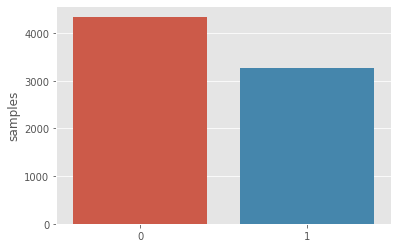

In [4]:
x = train.target.value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel('samples')
plt.show()

Ta có thể thấy rằng phân phối của tập train hơi lệch về phần non-disaster tweets 

### Average word length in a tweet

/home/nguyen.dinh.thien/anaconda3/envs/my_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nguyen.dinh.thien/anaconda3/envs/my_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


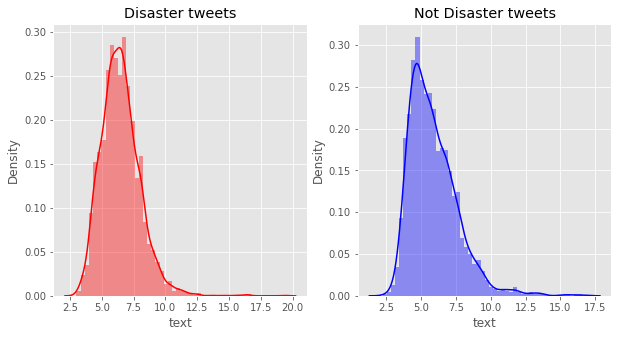

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
word = train[train['target']==1]['text'].str.split().map(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1, color='red')
ax1.set_title('Disaster tweets')
word = train[train['target']==0]['text'].str.split().map(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax2, color='blue')
ax2.set_title('Not Disaster tweets')
plt.show()

Ta có thể thấy rằng bên phía disaster tweets có lượng chữ dùng cho mỗi từ nhiều hơn(có thể là do nhấn mạnh).

### Xem xét lượng stopwords trong các sample

In [6]:
def create_corpus(target):
    corpus = []
    
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    
    return corpus

In [7]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
corpus = create_corpus(0)
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1
top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10]

/home/nguyen.dinh.thien/anaconda3/envs/my_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


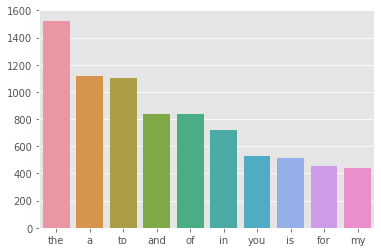

In [8]:
x, y = zip(*top)
sns.barplot(list(x), list(y))
plt.show()

In [9]:
corpus = create_corpus(1)
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1
top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10]

/home/nguyen.dinh.thien/anaconda3/envs/my_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


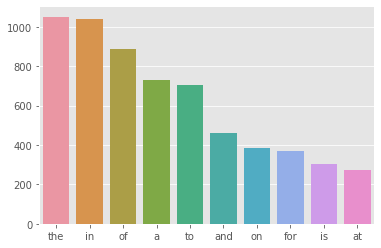

In [10]:
x, y = zip(*top)
sns.barplot(list(x), list(y))
plt.show()

### Xem xét lượng dấu câu

/home/nguyen.dinh.thien/anaconda3/envs/my_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


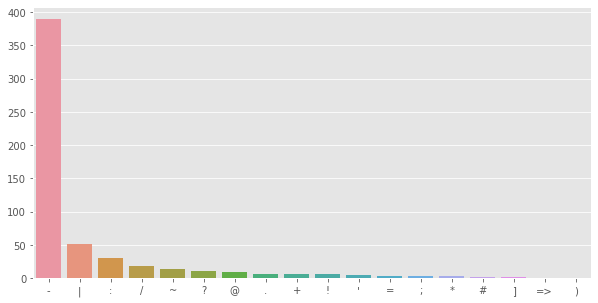

In [11]:
plt.figure(figsize=(10, 5))
corpus = create_corpus(1)

dic = defaultdict(int)
import string
special = string.punctuation
for word in corpus:
    if word in special:
        dic[word] += 1

top = sorted(dic.items(), key= lambda x: x[1], reverse=True)
x, y = zip(*top)
sns.barplot(list(x), list(y))
plt.show()

/home/nguyen.dinh.thien/anaconda3/envs/my_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


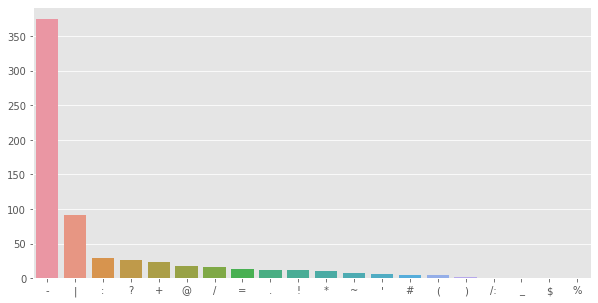

In [12]:
plt.figure(figsize=(10, 5))
corpus = create_corpus(0)
dic = defaultdict(int)
for word in corpus:
    if word in special:
        dic[word] += 1
top = sorted(dic.items(), key= lambda x:x[1], reverse=True)
x, y = zip(*top)
sns.barplot(list(x), list(y))
plt.show()

## Data Cleaning

In [13]:
df = train

In [14]:
df.shape

(7613, 5)

Chúng ta sẽ thực hiện 1 số bước xóa những thứ không có ích cho việc training làm model học nhanh hơn cũng như giảm độ dài câu giúp cho việc training theo batch được hiệu quả hơn.

In [15]:
def remove_URL(text):
    url = re.compile(r'http\S+|www\S+')
    return url.sub(r'', text)

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)    

def remove_tag(text):
    tag = re.compile(r'@\S+')
    return tag.sub(r'', text)

def remove_stw(text):
    for x in text.split():
        if x.lower() in stop:
            text = text.replace(x, "", 1)
    return text

def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r' NUMBER', text)

In [16]:
def clean_tweet(text):
    
    text = remove_URL(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = remove_punct(text)
    text = remove_tag(text)
    text = remove_number(text)
    return text
# text = remove_stw(text) ở đây thì mình thấy xóa stopwords làm giảm hiệu xuất model của mình, các bạn có thể thử

In [17]:
df['text'] = df['text'].map(lambda x: clean_tweet(x))

In [18]:
df['text']

0       Our Deeds are the Reason of this earthquake Ma...
1                   Forest fire near La Ronge Sask Canada
2       All residents asked to shelter in place are be...
3        NUMBER people receive wildfires evacuation or...
4       Just got sent this photo from Ruby Alaska as s...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    ariaahrary TheTawniest The out of control wild...
7610    M NUMBER  NUMBER UTC NUMBERkm S of Volcano Haw...
7611    Police investigating after an ebike collided w...
7612    The Latest More Homes Razed by Northern Califo...
Name: text, Length: 7613, dtype: object

Ở đây chúng ta nên gộp keyword vào phần text giúp cho việc nhận dạng được các sự kiện xảy ra.

In [19]:
df['text'] = df['keyword'].fillna('') + df['text']

In [20]:
df['text']

0       Our Deeds are the Reason of this earthquake Ma...
1                   Forest fire near La Ronge Sask Canada
2       All residents asked to shelter in place are be...
3        NUMBER people receive wildfires evacuation or...
4       Just got sent this photo from Ruby Alaska as s...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    ariaahrary TheTawniest The out of control wild...
7610    M NUMBER  NUMBER UTC NUMBERkm S of Volcano Haw...
7611    Police investigating after an ebike collided w...
7612    The Latest More Homes Razed by Northern Califo...
Name: text, Length: 7613, dtype: object

Ở đây ta sẽ đổi 1 số từ được viết tắt thành các từ hoàn chỉnh, giúp cho tokenizer hoạt động hiệu quả(Mình tham khảo ở link này: https://www.kaggle.com/ghaiyur/ensemble-models-versiong)

In [21]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [22]:
def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

In [23]:
df['text'] = df['text'].str.split().map(lambda x: [word_abbrev(i) for i in x]).map(lambda x: ' '.join(x))

## Chia train-test set 
Mình sẽ chia train-test theo tỷ lệ 0.7:0.3 do lượng dự liệu tương đối nhỏ.(Mình tham khảo qua video của Andrew Ng:
https://www.youtube.com/watch?v=1waHlpKiNyY)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(list(df['text']), list(df['target']), test_size=0.3)


In [25]:
X_train


['wreckageWreckage Conclusively Confirmed as From MH NUMBER Malaysia prime minister Investigators and the families of those who were',
 'attackedMy dog attacked me for my food pugprobs',
 'mass%20murderguardian Has Japan ever truly come to terms with devastation and mass murder of millions of Chinese and others with traditional weapons',
 'refugeesRepulsive RefugeesVictimiserDutton EvangelicalLiarAbbott co LNP on a dupe the press overdrive CHOPPERGATEBRONWYNBISHOPAUSPOL',
 'burningthe stars are burning i here your voice in my mind',
 'bioterrorismONUFrance NUMBER Bioterrorism on RockefellerChiRockefellerUnivHeiress NUMBER evade lgl efforts NUMBER prosecute BLKs NUMBER HarvardU kidnapgAFP',
 'loud%20bangneed to work in an office I can bang all my fav Future jams out loud',
 'cycloneroughdeal NUMBER ante hudhud cyclone Chandrababu Valle ne ante Ga',
 'famineThe famine is coming to an end Bluebell',
 'explodedJunko was NUMBER years old when the atomic bomb exploded over Hiroshima on Augus

## Model
Ở đây chúng ta sẽ dùng framwork là PyTorch và sử dụng thư viên transformers của Hugging Face để sử dụng pretrained Roberta 

In [26]:
from transformers import RobertaTokenizer, RobertaModel
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
DEVICE = torch.device('cuda:1')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

Ở đây mình sử dụng bidirectional LSTM cho nhiệm vụ downstream task(text classification) và Embedding đã được pre-trained của Roberta.

In [27]:
class Classifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout):
        super(Classifier, self).__init__()
        self.embedding = RobertaModel.from_pretrained('roberta-base')
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout, bidirectional=True)
        self.out = nn.Linear(hidden_size*2, 2)
        self.num_layers = num_layers
        self.hidden_size = hidden_size
    def forward(self, X, init):
        embedded = self.embedding(X).last_hidden_state
        out, _ = self.lstm(embedded, init)
        output = self.out(out[:, -1, :])
        return output
    def initialize(self, bsz):
        return (torch.zeros(2 * self.num_layers, bsz, self.hidden_size, device=DEVICE),
                torch.zeros(2 * self.num_layers, bsz, self.hidden_size, device=DEVICE))

### Khởi tạo model 
Ở đây mình sẽ trích xuất layer thứ 12 của roberta làm lớp embedding thứ 2 cho model trên.

In [28]:
from transformers import AdamW
from torch.optim.lr_scheduler import StepLR
batch_size = 32
model = Classifier(768, 256, 2, 0.1).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=5e-5, eps=1e-8)
train_iter = [i for i in zip(X_train, y_train)]
test_iter = [i for i in zip(X_test, y_test)]
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Tạo hàm train theo epoch

In [29]:
from torch.utils.data import DataLoader
def train_epoch(model, optimizer):
    model.train()
    losses = 0
    train_dataloader = DataLoader(train_iter, batch_size=batch_size, shuffle=True)
    correct = 0
    total = 0
    for X, y in tqdm(train_dataloader, colour='green'):
        tokens = tokenizer(X, return_tensors='pt', padding=True)['input_ids'].to(DEVICE)
        init = model.initialize(tokens.size(0))
        y = y.to(DEVICE)
        output = model(tokens, init)
        _, predicted = torch.max(output.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()
        
        optimizer.zero_grad()
        loss = criterion(output, y)
        loss.backward()
        
        optimizer.step()
        losses += loss.item()
    print('Accuracy: ', 100 * correct / total, "%" )   
    return losses / len(train_dataloader)

### Tạo hàm test

In [30]:
def test(model):
    model.eval()
    correct = 0
    total = 0
    test_dataloader = DataLoader(test_iter, batch_size=32, shuffle=False)
    for X, y in tqdm(test_dataloader, colour='green'):
        tokens = tokenizer(X, return_tensors='pt', padding=True)['input_ids'].to(DEVICE)
        init = model.initialize(tokens.size(0))
        y = y.to(DEVICE)
        output = model(tokens, init)
        _, predicted = torch.max(output.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()
    print('Accuracy: ', 100 * correct / total, "%" )

### Training

In [ ]:
from timeit import default_timer as timer

NUM_EPOCHS = 100

for epoch in range(1, NUM_EPOCHS+1):
    start_time = timer()
    train_loss = train_epoch(model, optimizer)
    scheduler.step()
    end_time = timer()
    print((f"Epoch: {epoch}, Train loss: {train_loss:.3f}, "f"Epoch time = {(end_time - start_time):.3f}s"))
    test(model)